In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import glob
import pandas as pd
import numpy as np
from sglm.helpers import filehelpers as fh, dfhelpers as dfh
from collections import defaultdict
from pathlib import Path

In [4]:
base_keys = list({
                'gACH':(0,0),
                'rDA':(0,0),
                'gDA':(0,0),
                'photometryCenterInIndex':(0,0),
                'photometryCenterOutIndex':(0,0),
                'photometrySideInIndex':(0,0),
                'photometrySideInIndexr':(0,0),
                'photometrySideOutIndex':(0,0),
                'sl': (0,0),
                'spnnrOff': (0,0),
                'photometryCenterInIndex':(0,0),
                'photometryCenterOutIndex':(0,0),
                'photometrySideInIndexAA':(0,0),
                'photometrySideInIndexAa':(0,0),
                'photometrySideInIndexaA':(0,0),
                'photometrySideInIndexaa':(0,0),
                'photometrySideInIndexAB':(0,0),
                'photometrySideInIndexAb':(0,0),
                'photometrySideInIndexaB':(0,0),
                'photometrySideInIndexab':(0,0),
                'photometrySideOutIndex':(0,0),
                'sl': (0,0),
                'spnnrOff': (0,0),
                }.keys())
# base_keys

used_run_majors = ['base_simple', 'base_words', '_to_']


In [5]:
# load_folder = base_location / Path(r'Figure_6_g1')
# h5_beta_locations = str((load_folder / Path(r'all/glu_run_*/coefs/*_best_coeffs.h5')).resolve())

# out_folder = base_location / Path(r'final_outputs_glu_run')

In [10]:
h5_lst = defaultdict(list)
run_id_dct = defaultdict(list)

# base_location = Path(r'/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/outputs')
base_location = Path(r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs-old')

fig_folder_lst = [# ('Figure_1_2', 'f1*-ft'),
#                   ('Figure_3',   'f3*-ft'),
#                   ('Figure_4_g1',   'f4*-ft'),
#                   ('Figure_4_g2',   'f4*-ft'),
#                   ('Figure_5_g1',   'f5*-ft'),
#                   ('Figure_5_g2',   'f5*-ft'),
#                   ('Figure_5_g5',   'f5*-ft'),
#                    ('Figure_6_g1', 'glu_run_20221202-no-CO_0-ft')
#                    ('Figure_6_g1', 'glu_run_20221202-30sft_0-ft')
#                    ('Figure_6_g1', 'glu_run_20221202-30sft-reduc_0-ft')
#                    ('Figure_6_g1', 'glu_run_20221202-30sft-paperfig_0-ft')
#                    ('Figure_6_g1-20sft', 'glu_run_20221212-20sft-paperfig_0-ft')
#                    ('Figure_6_g1-50sft', 'glu_run_20221213-50sft-paperfig_0-ft')
#                    ('Figure_6_g1--20_20sft', 'glu_run_20220109--20_20sft_0-ft')
                   ('Figure_7_g1--20_20sft', 'tet_run_20230403--20_20sft_0-ft'),
                   ('Figure_7_g1--20_20sft', 'tet_run_20230403--20_20sft_1-ft')
                 ]

for fig_folder in fig_folder_lst:
    print('fig_folder', fig_folder)
    
    load_folder = base_location / Path(fig_folder[0])
    # load_folder = base_location / Path(r'tmp')
    h5_beta_locations = str((load_folder / Path('all') / Path(fig_folder[1]) / Path(r'coefs\*_best_coeffs.h5')).resolve())
    
    
    print(h5_beta_locations)
    


#     base_location = Path(r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs')

#     load_folder = base_location / Path(r'Figure_1_2')
#     h5_beta_locations = str((load_folder / Path(r'all\f1*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_3')
#     # h5_beta_locations = str((load_folder / Path(r'all\f3*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_4_g1')
#     # h5_beta_locations = str((load_folder / Path(r'all\f4*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_4_g2')
#     # h5_beta_locations = str((load_folder / Path(r'all\f4*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_5_g1')
#     # h5_beta_locations = str((load_folder / Path(r'all\f5*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_5_g2')
#     # h5_beta_locations = str((load_folder / Path(r'all\f5*-ft\coefs\*_best_coeffs.h5')).resolve())

#     out_folder = base_location / Path(r'final_outputs')

#     # h5_beta_locations = Path('/Users/josh/Dropbox (HMS)/jz/Tetanus/1194_1195_1214_1258_1259_2_best_coeffs.h5')
#     out_loc = str((out_folder).resolve())
#     h5_beta_locations = glob.glob(h5_beta_locations)


    subloc_out = Path(f'final_out_{fig_folder[1]}')
    out_folder = base_location / subloc_out

    out_loc = str((out_folder).resolve())
    h5_beta_locations = glob.glob(h5_beta_locations)

    fh.create_folder_if_not_exists(out_loc)
    
    h5_lst = defaultdict(list)
    for h5_coef_fn in h5_beta_locations:
        h5f = pd.HDFStore(h5_coef_fn)
        h5fk = h5f.keys()
        for key in h5fk:
#             print(key)
            resp = key.split('_')[0].replace('/', '')
            model_version = '_'.join(key.split('_')[2:]).split('_run_num')[0]
            model_version = model_version.replace('5_base_words_gDA_to_gACH', '5_base_words_rDA_to_gACH')
    #         print(resp, model_version)
            h5_df = pd.read_hdf(h5f, key).reset_index()
            
#             display(h5fk)
            
            h5_df['fn'] = h5_coef_fn
            h5_df['key'] = key
            h5_df = h5_df.set_index(['fn','key'])


            h5_df = h5_df.sort_values('channel_name')
            h5_df['channel'] = h5_df['channel_name'].str.split('_').apply(lambda x: x[0])
            h5_df['run_num'] = h5_df['channel_name'].str.split('_').apply(lambda x: x[-1])

            h5_lst[(resp, model_version)].append(h5_df)
    #         h5_lst.append(h5_df)
    # concat = pd.concat(h5_lst, axis=0)

    fh.create_folder_if_not_exists(out_loc)



    a = None
    b = None

    h5_dfs = dict(h5_lst)
    for key in h5_dfs:
        run_major = '='.join(key)

        cont = True
        for runmajor in used_run_majors:
            if runmajor in run_major:
                cont = False
        if cont:
            continue

        val = h5_dfs[key]
        concat = pd.concat(val)

        all_kernels = []
        for base_key in base_keys:
            all_kernels += dfh.get_kernel_from_basename(base_key, list(concat.columns))


        gb_columns = ['mouse_id', 'channel', 'name']
        ak_unagg = concat.reset_index().set_index(['mouse_id', 'channel', 'name', 'run_num'])[all_kernels]

        ak_unagg.to_csv(str((Path(out_loc) / f'{load_folder.parts[-1]}-kernels_raw-{run_major}.csv').resolve()))

        kernels = ak_unagg.groupby(gb_columns).agg([np.mean, np.size, np.std])
        kernels = kernels.swaplevel(axis=1)

        ak = concat[all_kernels].copy()
        new_cols = [(dfh.shorten_col_name(_.split('_')[0]), int(_.split('_')[1])) for _ in ak.columns]



        ak.columns = pd.MultiIndex.from_tuples(new_cols)
        ak['1'] = 1
        akgb = ak.groupby('1').agg([np.mean, np.size, np.std]).stack().sort_index().droplevel(0).copy()
        akgb.loc['sem'] = akgb.loc['std']/np.sqrt(akgb.loc['size'])
    #     akgb = akgb.loc[['mean', 'sem']]
        final_out = akgb.stack(1).unstack(0).copy()
        final_out.columns = ['_'.join(_) for _ in final_out.columns]

    #     if a is None:
    #         a = final_out
    #     else:
    #         b = final_out
    #         break

    #     print(final_out.shape)
        final_out.to_csv(str((Path(out_loc) / f'{load_folder.parts[-1]}-kernels-{run_major}.csv').resolve()))
        
#         display(final_out)

    #     break

fig_folder ('Figure_7_g1--20_20sft', 'tet_run_20230403--20_20sft_0-ft')
C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs-old\Figure_7_g1--20_20sft\all\tet_run_20230403--20_20sft_0-ft\coefs\*_best_coeffs.h5


C:\Users\Josh\AppData\Local\Temp\ipykernel_10556\3060886038.py:135: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  akgb = ak.groupby('1').agg([np.mean, np.size, np.std]).stack().sort_index().droplevel(0).copy()


fig_folder ('Figure_7_g1--20_20sft', 'tet_run_20230403--20_20sft_1-ft')
C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs-old\Figure_7_g1--20_20sft\all\tet_run_20230403--20_20sft_1-ft\coefs\*_best_coeffs.h5


C:\Users\Josh\AppData\Local\Temp\ipykernel_10556\3060886038.py:135: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  akgb = ak.groupby('1').agg([np.mean, np.size, np.std]).stack().sort_index().droplevel(0).copy()


In [11]:
final_out

,CI_mean,CI_sem,CI_size,CI_std,CO_mean,CO_sem,CO_size,CO_std,SIAA_mean,SIAA_sem,...,SIab_size,SIab_std,SO_mean,SO_sem,SO_size,SO_std,spnnrOff_mean,spnnrOff_sem,spnnrOff_size,spnnrOff_std
-20,-0.128055,0.006830,10.0,0.021597,-0.075269,0.004201,10.0,0.013286,-0.012764,0.008568,...,10.0,0.106433,0.019547,0.003020,10.0,0.009552,-0.175222,0.018939,10.0,0.059891
-19,-0.172612,0.007587,10.0,0.023993,-0.087900,0.007019,10.0,0.022197,0.058396,0.006985,...,10.0,0.125286,0.004591,0.004357,10.0,0.013778,-0.149525,0.016866,10.0,0.053335
-18,-0.149593,0.008326,10.0,0.026330,-0.121466,0.009096,10.0,0.028765,0.154598,0.006904,...,10.0,0.121391,-0.013117,0.004784,10.0,0.015127,-0.118135,0.017001,10.0,0.053762
-17,-0.111400,0.008197,10.0,0.025923,-0.143758,0.009524,10.0,0.030116,0.192993,0.010459,...,10.0,0.133698,-0.016276,0.003712,10.0,0.011737,-0.081110,0.017670,10.0,0.055878
-16,-0.099601,0.008800,10.0,0.027827,-0.134199,0.009135,10.0,0.028887,0.211276,0.009346,...,10.0,0.139789,-0.019984,0.003760,10.0,0.011891,-0.052911,0.013475,10.0,0.042612
-15,-0.060737,0.008014,10.0,0.025344,-0.152400,0.008803,10.0,0.027838,0.259039,0.008023,...,10.0,0.124799,-0.040401,0.002818,10.0,0.008913,-0.035657,0.027356,10.0,0.086507
-14,-0.024501,0.007969,10.0,0.025199,-0.140657,0.009396,10.0,0.029713,0.305862,0.008225,...,10.0,0.137888,-0.056136,0.004779,10.0,0.015114,-0.039334,0.036790,10.0,0.116342
-13,-0.035963,0.009625,10.0,0.030437,-0.124986,0.009713,10.0,0.030716,0.379255,0.007631,...,10.0,0.131201,-0.073703,0.005383,10.0,0.017021,0.086937,0.036936,10.0,0.116803
-12,-0.060521,0.008047,10.0,0.025448,-0.125466,0.010130,10.0,0.032034,0.428754,0.005693,...,10.0,0.111800,-0.060478,0.005816,10.0,0.018392,0.026534,0.033303,10.0,0.105314
-11,-0.072978,0.009351,10.0,0.029572,-0.137249,0.010943,10.0,0.034604,0.434238,0.004500,...,10.0,0.124110,-0.087304,0.003702,10.0,0.011706,-0.065521,0.025608,10.0,0.080980


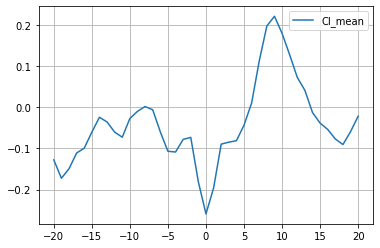

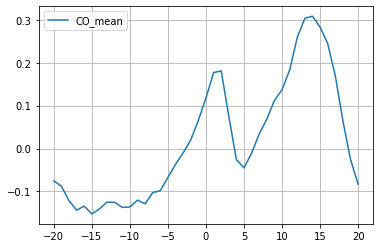

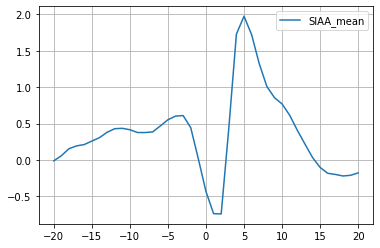

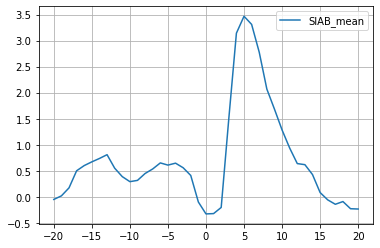

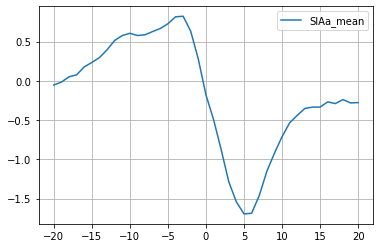

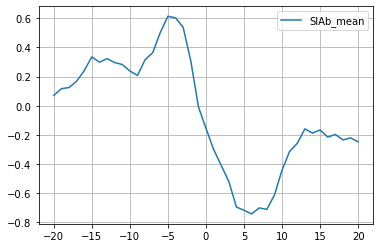

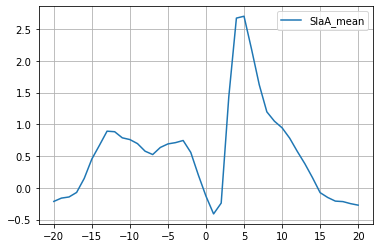

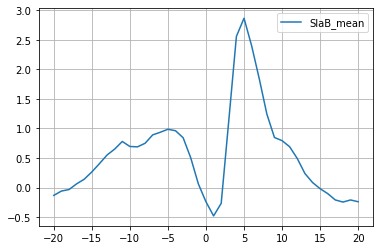

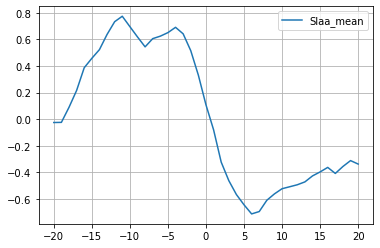

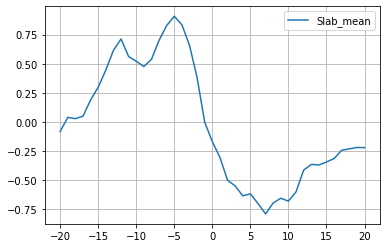

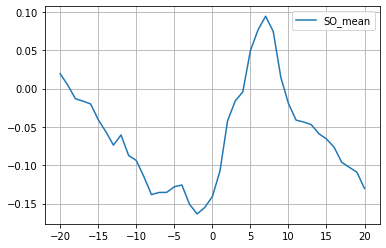

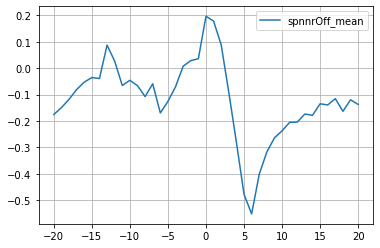

In [12]:
import matplotlib.pyplot as plt
for foc in final_out.columns:
    if 'mean' in foc:
        plt.figure()
        final_out[foc].plot(label=foc)
        plt.legend()
        plt.grid()